In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import naludaq
print(f"Naludaq version: {naludaq.__version__}")

Naludaq version: 0.31.7


In [8]:
from naludaq.backend import DiskAcquisition

ACQ_PATH = "data/SineWave_5MHz/"
channels = 4
# DiskAcquisition is recommended to be used as a context manager for safety
acq= DiskAcquisition(ACQ_PATH)
print(acq[0].keys())
# start = np.zeros((1013))
print("start window:")
print(acq[77]['start_window'])    #%  128   
print(acq[77]['window_labels'])    

# print(start.max())
# plt.hist(start, bins=30);
# plt.xlabel("start_window")
# plt.ylabel("counts")

dict_keys(['window_labels', 'data', 'start_window', 'window_timings', 'headers', 'time', 'created_at', 'pkg_num', 'event_num', 'name'])
start window:
417
[[417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463], [417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463], [417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463], [417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443

In [9]:
with DiskAcquisition(ACQ_PATH) as acq:
    print("Board model:", acq.params)
    print("Number of events:", len(acq))
    print("Pedestals stored:", acq.pedestals is not None)
acq= DiskAcquisition(ACQ_PATH)
from naludaq.tools.pedestals.pedestals_correcter import PedestalsCorrecter
pedestals=acq.pedestals
params = acq.params
corrector = PedestalsCorrecter(params, pedestals)


Board model: {'model': 'dsa-c10-8', 'channels': 8, 'windows': 510, 'samples': 64, 'chanmask': 61440, 'chanshift': 10, 'chips': {'0': {'channels': 4, 'name': 'aardvarcv3', 'readable_name': 'AARDVARCv3', 'resolution': 12, 'samples': 64, 'windows': 510}, '1': {'channels': 4, 'name': 'aardvarcv3', 'readable_name': 'AARDVARCv3', 'resolution': 12, 'samples': 64, 'windows': 510}}, 'clock_file': '/root/nalu/_internal/naluconfigs/data/clocks/Si5341_TRBHM_10GSaps_GCCsstx2_Registers.txt', 'connections': ['serial', 'd2xx', 'udp'], 'default_baud': {'115200': 868}, 'default_baudrate': 115200, 'default_clock': 100000000.0, 'default_divider': 868, 'default_trigger_value': 1500, 'ext_dac': {'channel_mapping': {'0': 0, '1': 2, '2': 5, '3': 7, '4': 0, '5': 2, '6': 5, '7': 7, 'cal0': 4, 'cal1': 4}, 'channels': {'0': 1706, '1': 1706, '2': 675, '3': 675, '4': 1706, '5': 675, '6': 675, '7': 675}, 'chip': 'ltc2620', 'chip_mapping': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 1, '5': 1, '6': 1, '7': 1, 'cal0': 0, 'c

In [10]:
cell_data = [[] for _ in range(128)]    
event_num = 77
print("Event number: {}".format(event_num))
event=acq[event_num]
corrected_event = corrector.run(event, correct_in_place=True)
start_window = event['start_window'] % 128
adc_values=corrected_event["data"] 

for i in range(1024):
        if (start_window % 2  == 0):
            cell = i % 128
            print(cell)
        else:
            cell = (i + 64) % 128
            print(cell)

        cell_data[cell].append(adc_values[4][i]) 

print(start_window)
print(start_window % 2)
print(cell_data)

Event number: 77
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117

Event number: 777


Text(0, 0.5, 'ADC Count')

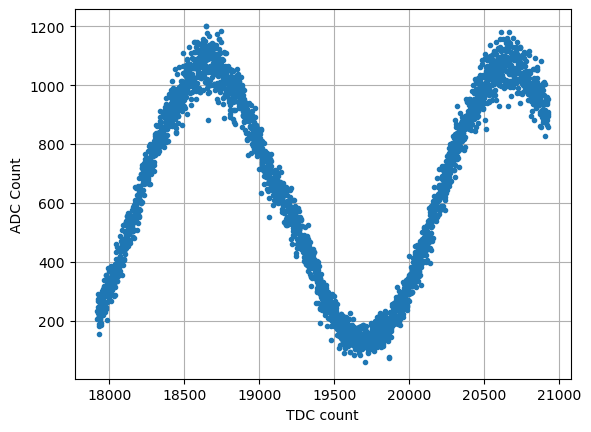

In [12]:
# event_num=np.random.randint(0, 1012)
event_num = 777
print("Event number: {}".format(event_num))
event=acq[event_num]
corrected_event = corrector.run(event, correct_in_place=True)
time=corrected_event["time"]
adc=corrected_event["data"]
plt.plot(time[4],adc[4],'.',label="Ch. 4")
plt.grid()
plt.xlabel("TDC count")
plt.ylabel("ADC Count")